In [1]:
import requests
import altair as alt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import requests
import numpy as np
import datetime
from chessdotcom import get_player_game_archives

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [2]:
player = 'Hikaru'

In [3]:
data = get_player_game_archives(player).json['archives']

In [4]:
data

['https://api.chess.com/pub/player/hikaru/games/2014/01',
 'https://api.chess.com/pub/player/hikaru/games/2014/02',
 'https://api.chess.com/pub/player/hikaru/games/2014/03',
 'https://api.chess.com/pub/player/hikaru/games/2014/04',
 'https://api.chess.com/pub/player/hikaru/games/2014/05',
 'https://api.chess.com/pub/player/hikaru/games/2014/06',
 'https://api.chess.com/pub/player/hikaru/games/2014/07',
 'https://api.chess.com/pub/player/hikaru/games/2014/08',
 'https://api.chess.com/pub/player/hikaru/games/2014/09',
 'https://api.chess.com/pub/player/hikaru/games/2014/10',
 'https://api.chess.com/pub/player/hikaru/games/2014/11',
 'https://api.chess.com/pub/player/hikaru/games/2014/12',
 'https://api.chess.com/pub/player/hikaru/games/2015/01',
 'https://api.chess.com/pub/player/hikaru/games/2015/02',
 'https://api.chess.com/pub/player/hikaru/games/2015/03',
 'https://api.chess.com/pub/player/hikaru/games/2015/04',
 'https://api.chess.com/pub/player/hikaru/games/2015/05',
 'https://api.

In [5]:
def get_games(monthly_games):
    all_months = pd.DataFrame()
    for url in monthly_games:
        if url[-7:-3]=='2022':
                response = requests.get(url).json()['games']
                all_months=pd.concat([all_months, pd.json_normalize(response, max_level=1)])
    return all_months
all_months = get_games(data)

In [6]:
all_months.drop([ 'url', 'pgn', 'tcn', 'uuid', 'initial_setup', 'fen', 'white.@id', 'white.uuid', 'black.@id', 'black.uuid'], axis = 1, inplace = True)

In [7]:
all_months

,time_control,end_time,rated,time_class,rules,accuracies.white,accuracies.black,white.rating,white.result,white.username,black.rating,black.result,black.username,tournament,start_time
0,180,1641159387,True,blitz,chess,83.21,79.29,3221,win,Hikaru,2947,resigned,Arash_Tahbaz,NaN,NaN
1,180,1641159740,True,blitz,chess,82.14,85.52,2944,resigned,Arash_Tahbaz,3224,win,Hikaru,NaN,NaN
2,180,1641160557,True,blitz,chess,87.09,89.44,2941,resigned,Arash_Tahbaz,3227,win,Hikaru,NaN,NaN
3,180,1641296028,True,blitz,chess,79.57,81.23,3221,repetition,Hikaru,2911,repetition,Robert_Chessmood,NaN,NaN
4,180,1641296111,True,blitz,chess,79.58,90.52,2909,resigned,Robert_Chessmood,3223,win,Hikaru,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,180,1668195576,True,blitz,chess,82.93,89.35,3021,resigned,GM_dmitrij,3194,win,Hikaru,NaN,NaN
132,180,1668195810,True,blitz,chess,89.04,80.46,3198,win,Hikaru,3017,resigned,GM_dmitrij,NaN,NaN
133,180,1668196157,True,blitz,chess,83.45,86.58,3013,checkmated,GM_dmitrij,3202,win,Hikaru,NaN,NaN
134,180,1668196484,True,blitz,chess,81.12,74.59,3206,win,Hikaru,3009,resigned,GM_dmitrij,NaN,NaN


In [8]:
all_months.end_time = pd.to_datetime(all_months.end_time,unit='s')
all_months.head()

,time_control,end_time,rated,time_class,rules,accuracies.white,accuracies.black,white.rating,white.result,white.username,black.rating,black.result,black.username,tournament,start_time
0,180,2022-01-02 21:36:27,True,blitz,chess,83.21,79.29,3221,win,Hikaru,2947,resigned,Arash_Tahbaz,NaN,NaN
1,180,2022-01-02 21:42:20,True,blitz,chess,82.14,85.52,2944,resigned,Arash_Tahbaz,3224,win,Hikaru,NaN,NaN
2,180,2022-01-02 21:55:57,True,blitz,chess,87.09,89.44,2941,resigned,Arash_Tahbaz,3227,win,Hikaru,NaN,NaN
3,180,2022-01-04 11:33:48,True,blitz,chess,79.57,81.23,3221,repetition,Hikaru,2911,repetition,Robert_Chessmood,NaN,NaN
4,180,2022-01-04 11:35:11,True,blitz,chess,79.58,90.52,2909,resigned,Robert_Chessmood,3223,win,Hikaru,NaN,NaN


In [9]:
all_months[player+"'s rating"] = np.where(all_months['white.username']==player,all_months['white.rating'],all_months['black.rating'])

In [10]:
all_months["opponent's rating"] = np.where(all_months['white.username']!=player,all_months['white.rating'],all_months['black.rating'])

In [11]:
all_months[player+" accuracy"] = np.where(all_months['white.username']==player,all_months['accuracies.white'],all_months['accuracies.black'])

In [12]:
all_months["Opponent accuracy"] = np.where(all_months['white.username']!=player,all_months['accuracies.white'],all_months['accuracies.black'])

In [13]:
all_months.head(3)

,time_control,end_time,rated,time_class,rules,accuracies.white,accuracies.black,white.rating,white.result,white.username,black.rating,black.result,black.username,tournament,start_time,Hikaru's rating,opponent's rating,Hikaru accuracy,Opponent accuracy
0,180,2022-01-02 21:36:27,True,blitz,chess,83.21,79.29,3221,win,Hikaru,2947,resigned,Arash_Tahbaz,NaN,NaN,3221,2947,83.21,79.29
1,180,2022-01-02 21:42:20,True,blitz,chess,82.14,85.52,2944,resigned,Arash_Tahbaz,3224,win,Hikaru,NaN,NaN,3224,2944,85.52,82.14
2,180,2022-01-02 21:55:57,True,blitz,chess,87.09,89.44,2941,resigned,Arash_Tahbaz,3227,win,Hikaru,NaN,NaN,3227,2941,89.44,87.09


In [14]:
all_months.resample('M', on = 'end_time')[['accuracies.white']].mean()

,accuracies.white
end_time,
2022-01-31,84.323289
2022-02-28,85.574318
2022-03-31,83.888330
2022-04-30,84.397078
2022-05-31,85.290592
2022-06-30,87.064474
2022-07-31,85.208520
2022-08-31,84.668485
2022-09-30,85.122802


In [24]:
#all_months.resample('M', on = 'end_time')[player+"'s rating"].mean().plot()
df = all_months.groupby('time_class').resample('M', on = 'end_time')[[player+"'s rating"]].mean().reset_index()
df_wide = df.pivot("end_time", "time_class", player+"'s rating")

df_wide = df_wide.fillna(method="ffill")
df_wide.head()


C:\Users\user\AppData\Local\Temp\ipykernel_7348\3127646824.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_wide = df.pivot("end_time", "time_class", player+"'s rating")


time_class,blitz,bullet,daily,rapid
end_time,,,,
2022-01-31,3195.938967,3316.000000,2239.0,2740.000000
2022-02-28,3192.820000,3319.000000,2239.0,2870.913043
2022-03-31,3144.923611,3332.489796,2239.0,2874.045455
2022-04-30,3198.723350,3295.350000,2239.0,2850.490909
2022-05-31,3187.152416,3300.857143,2239.0,2843.770833


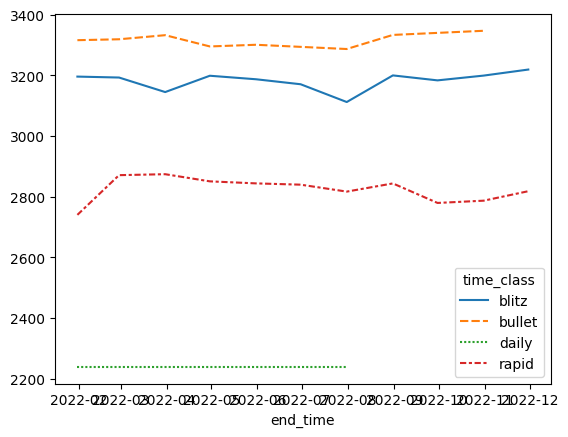

In [16]:
fig = sns.lineplot(data=df_wide)

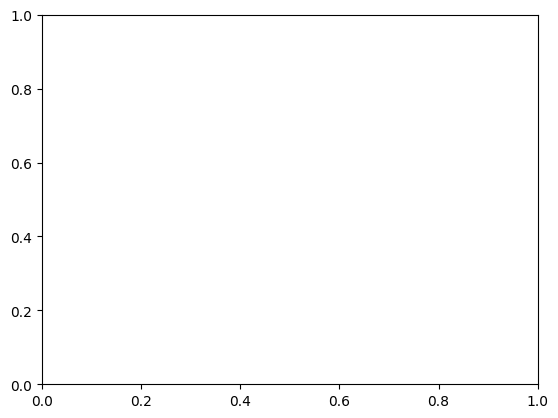

In [17]:
ax , fig = plt.subplots(nrows=1, ncols=1)

In [18]:
sns.histplot(data=all_months, x = player+"'s rating'")

ValueError: Could not interpret value `Hikaru's rating'` for parameter `x`

In [ ]:
all_months_rapid = all_months[all_months.time_class=='rapid']
sns.histplot(data=all_months_rapid, x = "opponent's rating'", hue = 'time_class')

In [ ]:
all_months_blitz = all_months[all_months.time_class=='blitz']
sns.histplot(data=all_months_blitz, x = "opponent's rating'", hue = 'time_class')

In [ ]:
sns.histplot(data=all_months, x = "opponent's rating'", hue = 'time_class')

In [ ]:
a = response = requests.get(data[0]).json()['games']

In [ ]:
has_records = any(all_months['end_time'])

In [ ]:
has_records

In [ ]:
all_months.end_time.count()

In [ ]:
all_months.groupby('time_class').end_time.count()['blitz']

In [ ]:
all_months[all_months.time_class == 'daily'].shape[0]

In [ ]:
sns.countplot(data=all_months, y ='white.result')

In [ ]:
all_months['accuracies.white'].count()

In [ ]:
sns.relplot(data=all_months, x = player+" accuracy", y = 'Opponent accuracy', col = 'time_class', kind = 'scatter')

In [ ]:
print(data)